In [1]:
# 말뭉치(corpus) : 자연어 분석 작업을 위해 만든 문서 집합
import nltk
# NLTK 패키지에서 제공하는 샘플 말뭉치 다운로드, 시간이 많이 걸림
nltk.download("book", quiet=True)
from nltk.book import *
#저작권이 만료된 문학작품이 포함된 말뭉치
nltk.corpus.gutenberg.fileids()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
#제인 오스틴의 엠마 문서
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [3]:
# 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.
# 이 문자열 단위를 토큰(token)이라고 하고
# 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing) 이라고 함
# 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.
# 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.
# 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1000])[3]) #3번 문장

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [4]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100]) #50~99 단어

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [5]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()
words = ["fly", "flies", "flying", "flew", "flown"]
print( [st1.stem(w) for w in words] )
print( [st2.stem(w) for w in words] )

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [17]:
#원형 복원 : 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
#품사를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lm = WordNetLemmatizer()
words = ["fly", "flies", "flying", "flew", "flown"]
#동사원형
[lm.lemmatize(w, pos="v") for w in words]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['fly', 'fly', 'fly', 'fly', 'fly']

In [8]:
#품사의 예
# NNP: 단수 고유명사
# VB: 동사
# VBP: 동사 현재형
# NN: 명사
#품사 목록
nltk.help.upenn_tagset()
#품사에 대한 설명
nltk.help.upenn_tagset("VB")

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

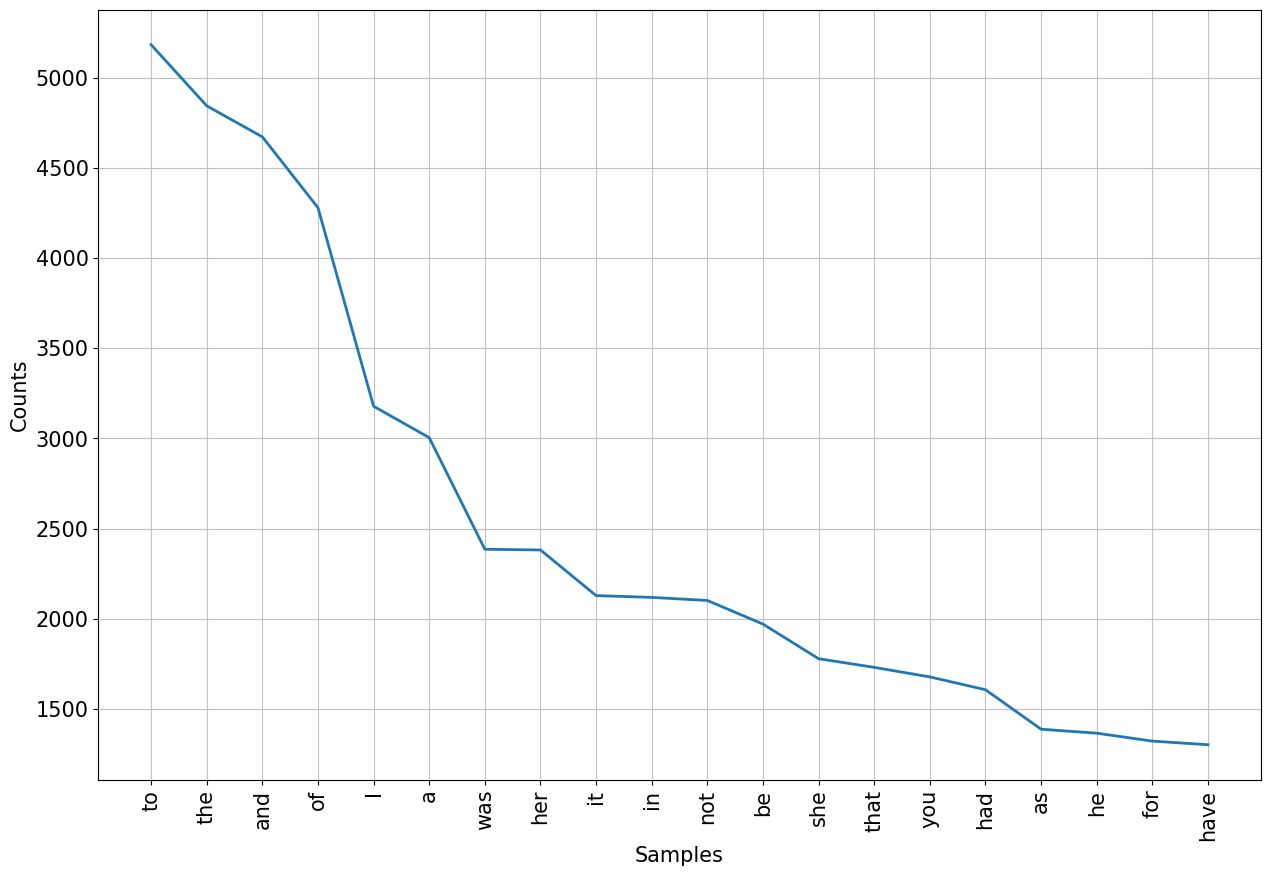

In [9]:
#각 단어의 사용 빈도를 그래프로 출력
from nltk import Text
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+") #특수문자 제거
#retokenize.tokenize(emma_raw[50:100])
text = Text(retokenize.tokenize(emma_raw))
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["font.size"]=15
text.plot(20) #상위 20개의 단어 출력
plt.show()

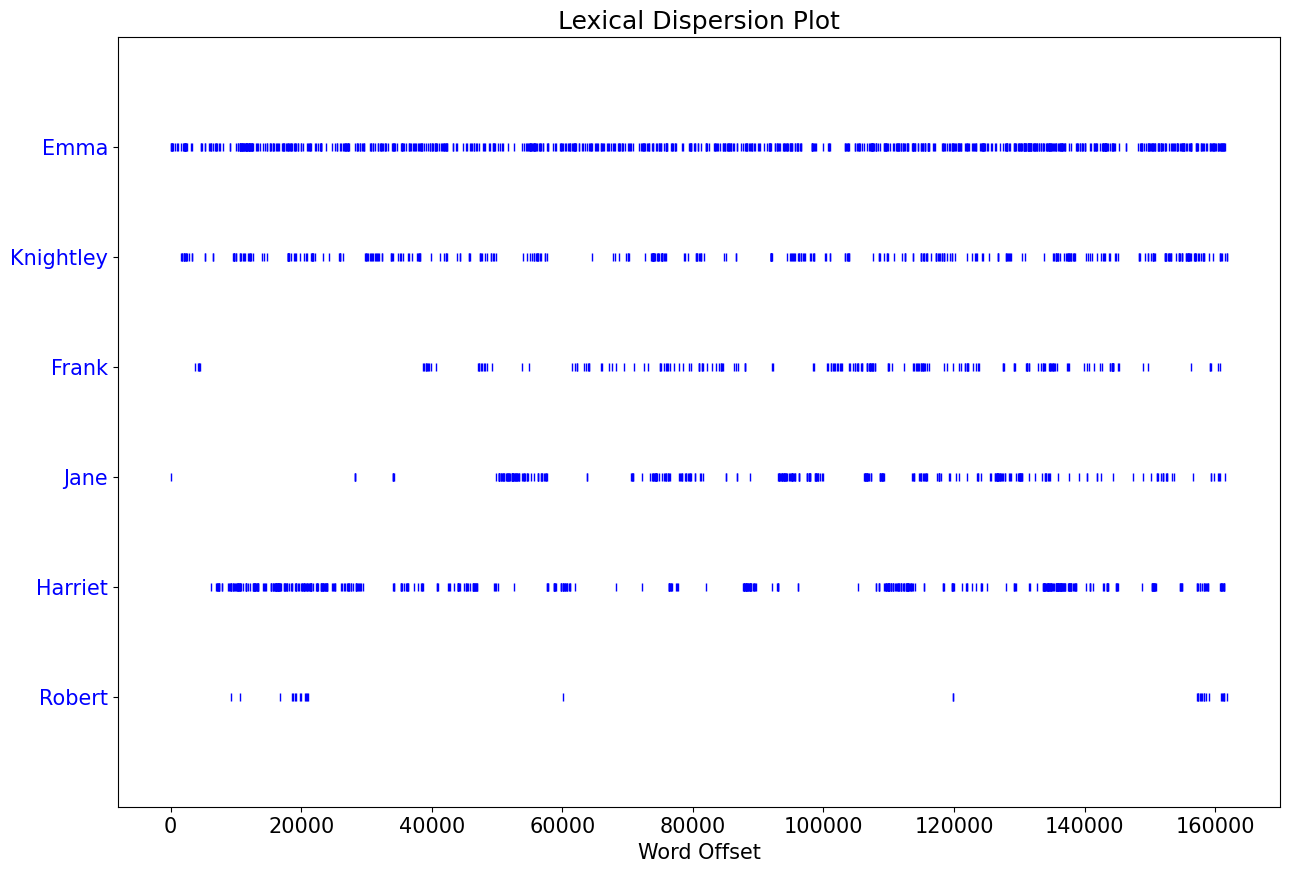

In [10]:
#단어가 사용된 위치를 시각화
#소설 엠마의 각 등장인물에 대해 적용
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [11]:
#해당 단어의 앞뒤에 사용된 단어
text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [12]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [13]:
#두 단어가 공통적으로 들어갈 수 있는 문맥 확인
text.common_contexts(['Emma','she'])
# 밑줄 부분에 Emma와 she가 들어갈 경우 같은 의미가 됨

said_i and_could but_could said_as and_was that_could and_felt
which_could that_began than_had but_was that_should this_could
there_was said_in as_could think_was as_felt that_was which_had


In [14]:
from nltk import FreqDist
from nltk.tag import pos_tag
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
# NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and
t[0] not in stopwords]
#FreqDist : 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
#Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체 생성
fd_names = FreqDist(names_list)
#전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")
#most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

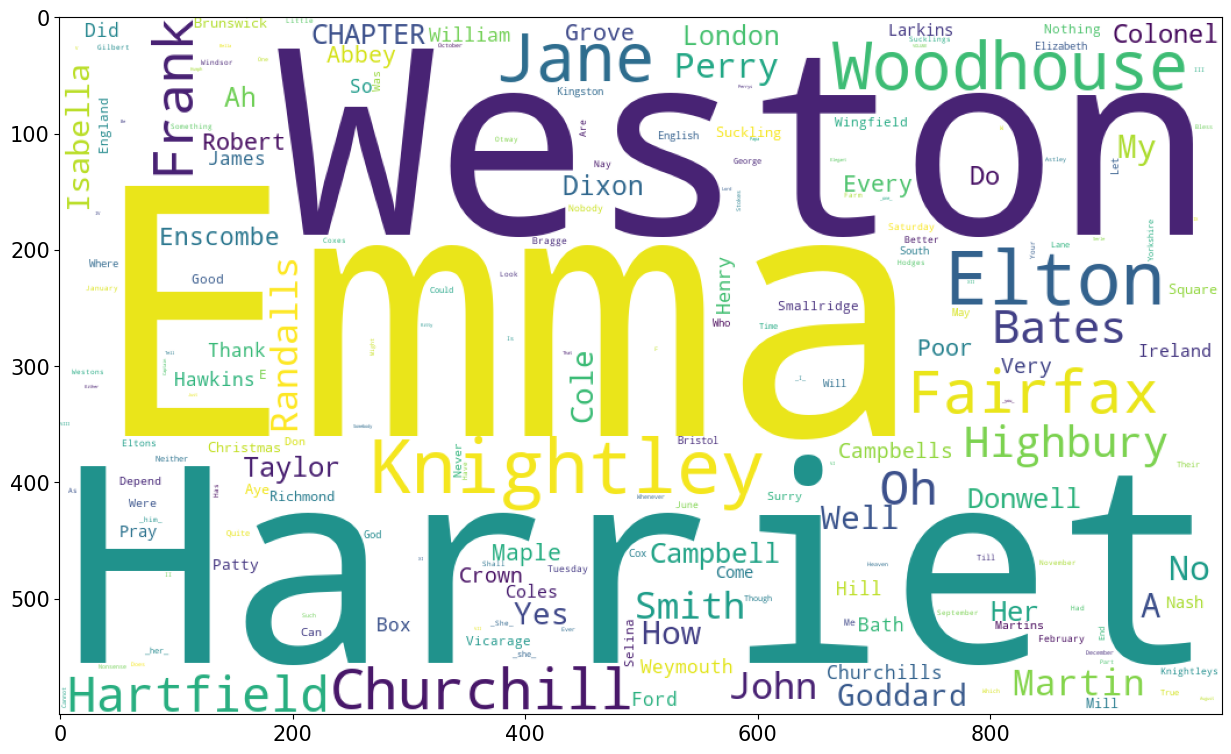

In [15]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()